# Let's build a Language Model like Chat GPT!
We'll follow along with this youtube video:
https://www.youtube.com/watch?v=l-CjXFmcVzY&t=2197s

## Starting out with inputs and weights
Is the light on or off?  x# represent the switches on the wall and w# represent training data.  We can cross the inputs with training data to find if the light is on:

In [2]:
x1 = 0
x2 = 1
x3 = 0

w1 = 1
w2 = 0
w3 = 1

y = (x1 * w1) + (x2 * w2) + (x3 * w3)
if y > 0:
    light = 'on'
else:
    light = 'off'
print(light)

off


We can use numpy arrays instead of having loads of variables for inputs and weights:

In [4]:
import numpy as np

xs = np.asarray([0, 1, 0, 1, 0])
ws = np.asarray([1, 0, 1, 0, -1])
y = np.dot(xs, ws)  # y = xs @ ws

if y > 0:
    light = 'on'
else:
    light = 'off'
print(light)

on


We need to automatically adjust the weights if we want our model to learn, so let's add additional events to xs and some known outputs ys.  Our weights are unknown/hidden. 

We'll start with a random guess at the weights and track our error over 5k tries at guessing propper weights.  Do we even find a solution over 5k tries?

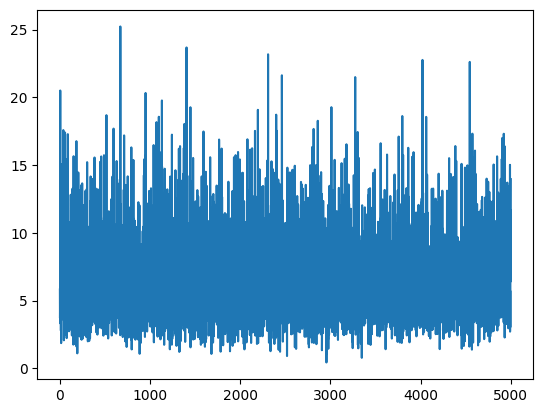

In [ ]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([[0, 1, 0, 1, 0],
                 [0, 0, 1, 1, 0],
                 [1, 1, 0, 1, 0],
                 [1, 1, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

# ws is now hidden
ys = np.asarray([[0],
                 [1],
                 [1],
                 [1],
                 [0]])

ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins, outs)

ers = []
for i in range(5000):
    yh = xs @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if e < 0.05:
        print("found solution")
        print(ws)
    else:
        ws = weights(ins, outs)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

No Solution!  We need better learning!  we'll adopt a strategy where instead of guessing all new eights, we make changes to our weights and if our changes make an improvement, we keep them.  We'll iterate like this. 

found solution
[[ 1.0280221 ]
 [ 0.01183635]
 [ 1.01485508]
 [-0.01320741]
 [-1.05673078]]


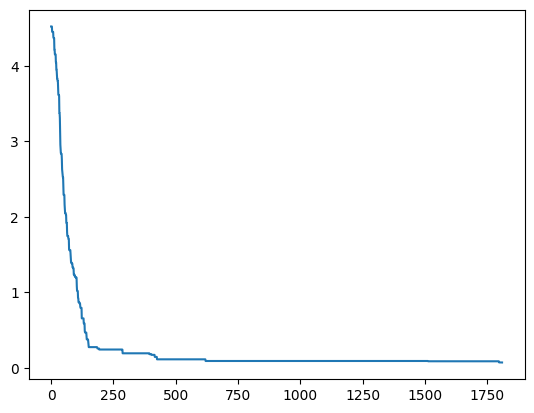

In [ ]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([[0, 1, 0, 1, 0],
                 [0, 0, 1, 1, 0],
                 [1, 1, 0, 1, 0],
                 [1, 1, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

# ws = np.asarray([1, 0, 1, 0, -1]) # hidden!

ys = np.asarray([[0],
                 [1],
                 [1],
                 [1],
                 [0]])

ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins, outs)

ers = []
for i in range(5000):
    yh = xs @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if e < 0.05:
        print("found solution")
        print(ws)
        break
    else:
        # mutation = weights(ins, outs) * 0.1
        mutation = weights(ins, outs) * 0.03
        cw = ws + mutation

        yh = xs @ cw
        ce = yh - ys
        ce = np.sum(np.abs(ce))

        if ce < e:
            ws = cw
    ers.append(e)

plt.figure(1)
plt.plot(ers)

That looks better, but it still doesn't find a solution. 

**Exercise**
Reduce the scaling factor on the mutation from 0.1 to 0.03 and re-run it.  It should find a solution now!  So we can add a break after our print statements. 

Verify that the identified weights are close to our commented out hidden weights!

Change ys to 0, 0, 0, 3, 3 and re-run.  No solution found, right?  Even if we increase our number of tries?  Might take a long time. 

## Non-liner stuff

For these output values, we need to add a bias term because our data is not centered on zero.  These are additional ones added on the end of the inputs and are necessare to model the shifts in the data. 

found solution
[[ 3.79725462e-03]
 [-2.97033251e+00]
 [-2.96683902e+00]
 [-5.54670775e-01]
 [ 5.41157497e+00]
 [ 3.52382778e+00]]


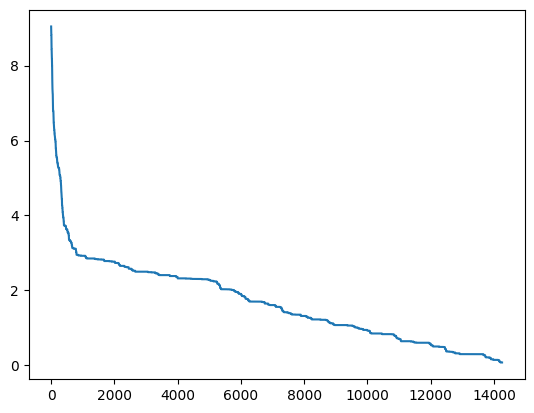

In [26]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([[0, 1, 0, 1, 0],
                 [0, 0, 1, 1, 0],
                 [1, 1, 0, 1, 0],
                 [1, 1, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

# ws = np.asarray([1, 0, 1, 0, -1]) # hidden!

ys = np.asarray([[0],
                 [0],
                 [0],
                 [3],
                 [3]])

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins+1, outs)

ers = []
for i in range(15000):
    yh = xs @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if e < 0.05:
        print("found solution")
        print(ws)
        break
    else:
        # mutation = weights(ins, outs) * 0.1
        mutation = weights(ins+1, outs) * 0.03
        cw = ws + mutation

        yh = xs @ cw
        ce = yh - ys
        ce = np.sum(np.abs(ce))

        if ce < e:
            ws = cw
    ers.append(e)

plt.figure(1)
plt.plot(ers)

We're still not narrowing in on a solution.  Our simple network can only find linear solutions, but if our problem is non-linear, we can't find a solutin because we cannot fit a line to a curve, no matter what slope we give it. 

To solve this, we add two things:
* Another layer of weights connected to some middle nodes
* Apply an non-linear activation function to the middle neurons.  Sigmoid, tanh, ReLU, Leaky ReLU, Maxout, ELU, 

We'll use a sin wave.  We know from forie transform that we can approximate any signal by adding together sin waves. 

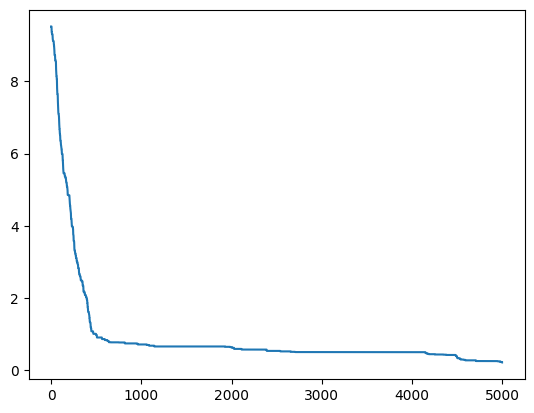

In [33]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([[0, 1, 0, 1, 0],
                 [0, 0, 1, 1, 0],
                 [1, 1, 0, 1, 0],
                 [1, 1, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

# ws = np.asarray([1, 0, 1, 0, -1]) # hidden!

ys = np.asarray([[0],
                 [0],
                 [0],
                 [3],
                 [3]])

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

ins = 5
outs = 1
nodes = 15

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

wi = weights(ins+1, nodes)
ws = weights(nodes, outs)

ers = []
for i in range(5000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if e < 0.05:
        print("found solution")
        print(ws)
        break
    else:
        # mutation = weights(ins, outs) * 0.1
        mutation = weights(nodes, outs) * 0.03
        cw = ws + mutation

        x = xs @ wi
        x = np.sin(x)
        yh = x @ cw
        ce = yh - ys
        ce = np.sum(np.abs(ce))

        if ce < e:
            ws = cw
    ers.append(e)

plt.figure(1)
plt.plot(ers)

Yay, we found a solution.  

**Exercise**:
Reduce the number of intermediary nodes to 5. What happens?  

Five is not enough if we want to find a solutino in 5k attempts, but if we use a better search algorithm.  

E.g. we can do a bredth first search where we make multiple children and then explore multiple childrens family lines at a time in parallel. 

This sacrifices many children. There is another way - we can check explore the optoin which has the steepest slope toward our goal.  We take the derivative 

found solution
[[ 1.84319933]
 [ 0.36640227]
 [-0.45447801]
 [ 0.1995179 ]
 [ 0.20053693]
 [-1.12094583]
 [ 0.56073044]
 [ 0.73116379]
 [-1.00306465]
 [ 1.20739363]
 [ 1.63687894]
 [-0.39957122]
 [ 1.22854594]
 [ 0.36304141]
 [-1.53689375]]


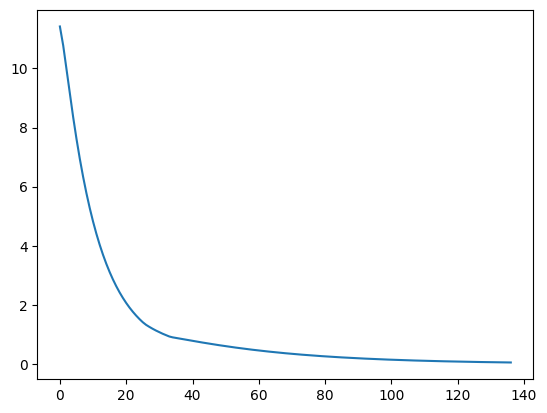

In [34]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([[0, 1, 0, 1, 0],
                 [0, 0, 1, 1, 0],
                 [1, 1, 0, 1, 0],
                 [1, 1, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

# ws = np.asarray([1, 0, 1, 0, -1]) # hidden!

ys = np.asarray([[0],
                 [0],
                 [0],
                 [3],
                 [3]])

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

ins = 5
outs = 1
nodes = 15

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

wi = weights(ins+1, nodes)
ws = weights(nodes, outs)

ers = []
for i in range(5000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = (yh - ys) * 1
    ws -= (x.T @ e) * 0.03
    e = np.sum(np.abs(e))
    if e < 0.05:
        print("found solution")
        print(ws)
        break

    ers.append(e)

plt.figure(1)
plt.plot(ers)

Wow we found a solution in just a couple hundred iterations. 

**Exercise**:
* Remove the break and see how close we get to the actual solution.
* Try using 5 nodes.  Do we find a solution? 
* How about 2 nodes?

Two nodes doesn't work because we can get stuck on a local maximum.  We need additoinal dimensionality from more nodes. 

So far we've only fine-tuned the outer layer of nodes.  If we tune the inner layer, we might capture hierarchical structures and be able to model with fewer parameters. 

Example, we need 15 parameters to model 5 trippel leters, but with middle layers to model repeated patters across the tripples, we can use fewer parameters.  

We need to train the middle layers with back propagation!

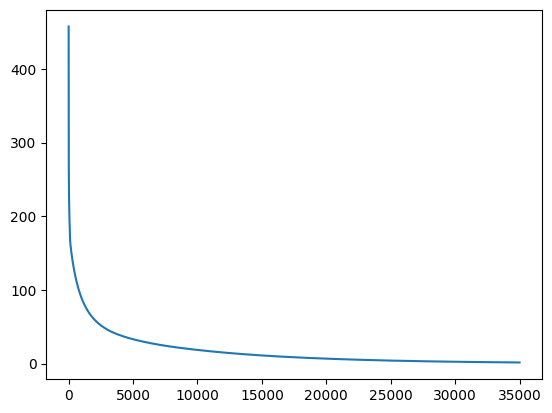

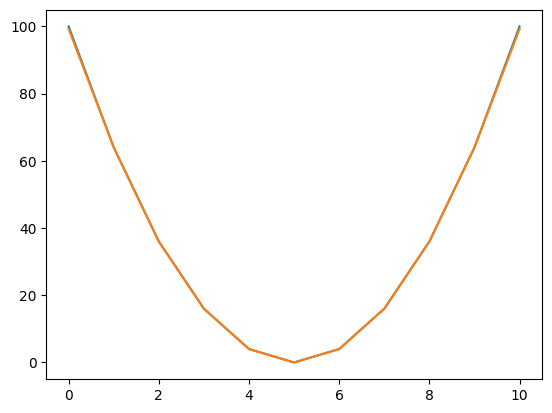

In [54]:
import numpy as np
import matplotlib.pylab as plt

# Problem 0
# xs = np.asarray([[0, 1, 0, 1, 0],
#                  [0, 0, 1, 1, 0],
#                  [1, 1, 0, 1, 0],
#                  [1, 1, 1, 0, 1],
#                  [0, 0, 0, 1, 0]])

# ys = np.asarray([[0],
#                  [0],
#                  [0],
#                  [3],
#                  [3]])

# Problem 1
# xs = np.asarray([[1, 0], [0, 1], [1, 1], [0, 0]])
# ys = np.asarray([[1], [1], [0], [0]])

# Problem 2
xs = np.asarray([[-10], [-8], [-6], [-4], [-2], [0], [2], [4], [6], [8], [10]])
# ys = 0.5 * xs + 7
ys = xs ** 2

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

ins = 1  # 2  # 5
outs = 1
nodes = 100  # 20  # 2
lr = 0.0000005  # 0.03

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes)
w2 = weights(nodes, outs)

ers = []
for i in range(35000):
    x0 = xs

    z0 = (x0 @ w0); x1 = np.sin(z0)
    z1 = (x1 @ w1); x2 = np.sin(z1)
    yh = (x2 @ w2)

    e = (yh - ys)

    e2 = (e) * 1
    e1 = (e @ w2.T) * np.cos(z1)
    e0 = (e1 @ w1.T) * np.cos(z0)

    w2 -= (x2.T @ e) * lr
    w1 -= (x1.T @ e1) * lr
    w0 -= (x0.T @ e0) * lr

    e = np.sum(np.abs(e))

    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys, label='ys')
plt.plot(yh, label='yh')

Yadda yadda, lots of work to approximate a simple function.  Like using a tank to kill a fly.  Anyway, we're going to do stuff with more layers and need to install pytorch.

https://pytorch.org/get-started/locally/

loss: 246631.640625
loss: 69992.8046875
loss: 31578.111328125
loss: 13223.3251953125
loss: 5160.99169921875
loss: 2281.835693359375
loss: 782.9633178710938
loss: 201.0695343017578
loss: 47.200313568115234
loss: 4.3181257247924805


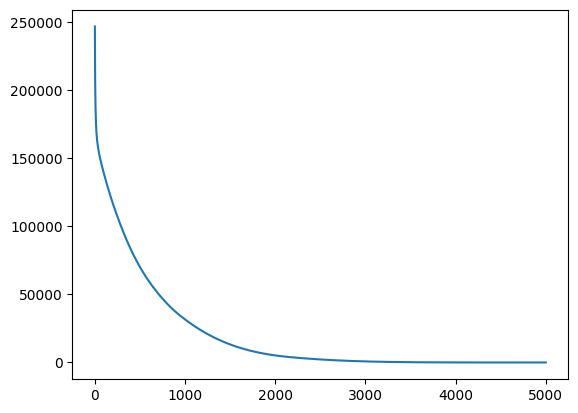

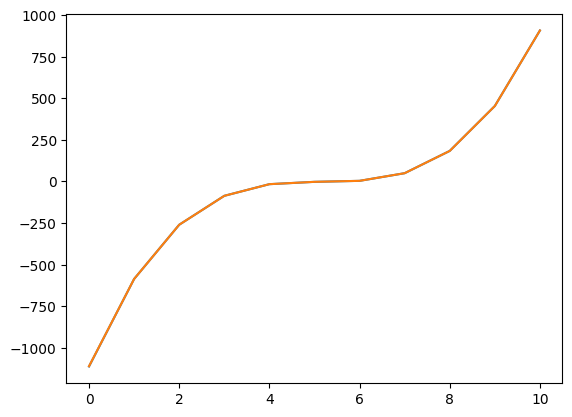

In [62]:
import numpy as np
import matplotlib.pylab as plt
import torch
from torch.nn import functional as F

# Problem 0
# xs = np.asarray([[0, 1, 0, 1, 0],
#                  [0, 0, 1, 1, 0],
#                  [1, 1, 0, 1, 0],
#                  [1, 1, 1, 0, 1],
#                  [0, 0, 0, 1, 0]])

# ys = np.asarray([[0],
#                  [0],
#                  [0],
#                  [3],
#                  [3]])

# Problem 1
# xs = np.asarray([[1, 0], [0, 1], [1, 1], [0, 0]])
# ys = np.asarray([[1], [1], [0], [0]])

# Problem 2
xs = np.asarray([[-10], [-8], [-6], [-4], [-2], [0], [2], [4], [6], [8], [10]])
# ys = 0.5 * xs + 7
# ys = xs ** 2
ys = xs ** 3 - xs**2 + xs - 3

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

xs = torch.tensor(xs).float()
ys = torch.tensor(ys).float()

ins = 1
outs = 1
nodes = 200
lr = 0.003

def weights(ins, outs):
    ws = torch.randn(ins, outs)
    ws = ws.requires_grad_(True)
    return ws

w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes)
w2 = weights(nodes, outs)

optimizer = torch.optim.Adam([w0, w1, w2], lr)

ers = []
for i in range(5000):
    x0 = xs

    z0 = (x0 @ w0); x1 = torch.sin(z0)
    z1 = (x1 @ w1); x2 = torch.sin(z1)
    yh = (x2 @ w2)

    loss = F.mse_loss(yh, ys)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = loss.item()

    if i % 500 == 0:
        print('loss:', e)

    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys, label='ys')
plt.plot(yh.detach(), label='yh')

loss: 2859.491943359375
loss: 0.0003213828313164413
loss: 1.1633167559921276e-05
loss: 0.0007853857823647559
loss: 0.10190165787935257
loss: 8.44282767502591e-05
loss: 0.00013280313578434289
loss: 1.0274457054038066e-05
loss: 3.554864917987288e-07
loss: 1.3268711427372182e-06


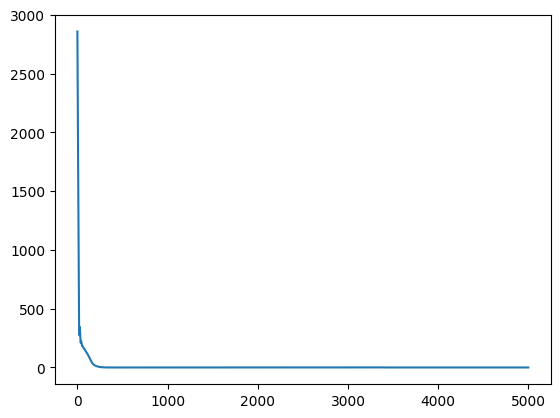

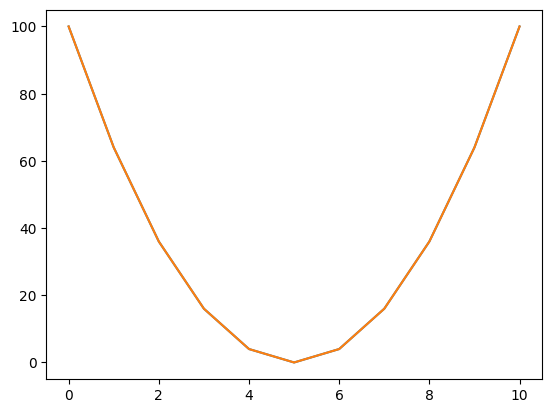

In [76]:
import numpy as np
import matplotlib.pylab as plt
import torch
from torch.nn import functional as F


xs = np.asarray([[-10], [-8], [-6], [-4], [-2], [0], [2], [4], [6], [8], [10]])
# ys = xs ** 3 - xs**2 + xs - 3
ys = xs ** 2

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

xs = torch.tensor(xs).float()
ys = torch.tensor(ys).float()

ins = 1
outs = 1
nodes = 200
lr = 0.003

params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) * 0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws

class Model():
    def __init__(self):
        self.w0 = weights(ins+1, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        yh = (x @ self.w2)
        return yh

model = Model()
optimizer = torch.optim.Adam(params, lr)

ers = []
for i in range(5000):
    yh = model.forward(xs)

    loss = F.mse_loss(yh, ys)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = loss.item()

    if i % 500 == 0:
        print('loss:', e)

    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys, label='ys')
plt.plot(yh.detach(), label='yh')


In [80]:
value = 100
value = torch.tensor([value, 1]).float()
result = model.forward(value)
print(result)

tensor([1444.6680], grad_fn=<SqueezeBackward4>)


We can fit any data with enough nodes. 
Poor interpolation, but we can mitigate this with more data, more training, and more constraints. 
Experiment and see what works!

we can use anything as input and output.  Images, medical data, dogs, text. 

In [1]:
text = '''
Cats, cats, everywhere
Furry balls without a care
Purring, meowing, licking fur
Hunting mice, they always purr

Cats, cats, on the prowl
Jumping high, never a scowl
Whiskers twitching, eyes alert
Tail in air, ready to assert

Cats, cats, so much fun
Cuddling close in the sun
Stretching out, napping long
Playing with string, never wrong

Cats, cats, always cool
Lapping milk, acting like a fool
Mysterious, charming, full of grace
Cats are simply ace

Cats, cats, with silky fur
Making biscuits, they always purr
Sitting high, looking down
Claiming everything as their crown

Cats, cats, with eyes so bright
Chasing shadows, day or night
Curled up warm, on your lap
Purring gently, taking a nap

Cats, cats, with playful paws
Hiding, stalking, never pause
Jumping, leaping, so agile
Graceful creatures, never fragile

Cats, cats, our feline friends
Bringing joy that never ends
Loving us, without a doubt
Cats are what life's all about

Cats, cats, everywhere I see
Furry creatures, cute as can be
Rubbing against our legs
Asking for treats, without begs

Cats, cats, with their regal stance
Graceful movements, they enhance
But we love them all the same
Our little friends, never tame

Cats, cats, so full of love
Watching over us from above
Protecting us from any harm
Always there, with their charm

Cats, cats, with their curious ways
Exploring nooks, and hiding in bays
Living life with style and grace
Cats are always in first place

Cats, cats, so full of fun
Chasing toys, never done
Hiding in boxes, or paper bags
Making us laugh, never drags

Cats, cats, with their own minds
Sitting in the sun, never blinds
Chasing strings, and balls of yarn
They never tire, oh what a charm

Cats, cats, with calming purrs
Cuddling close, to be yours
Giving love, without any fuss
Their presence, a comfort to us

Cats, cats, always at ease
Living life, as they please
Bringing joy, to all they meet
Cats, our furry friends, so sweet

Cats, cats, with eyes so bright
Guiding us through the darkest night
Purring softly, by our side
Comforting us, as we hide

Cats, cats, with softest fur
Nuzzling close, making a purr
In our lap, they take a rest
We're lucky to have, such a guest

Cats, cats, with their playful ways
Entertaining us, on the laziest days
Chasing shadows, or a feather
Making us smile, always together

Cats, cats, with hearts so pure
Bringing love, that will endure
Their presence, a blessing indeed
Cats, our friends, we shall never need

Cats, cats, with their little quirks
Scratching posts, and tiny perks
Licking paws, cleaning their face
Chasing tails, all over the place

Cats, cats, with their playful hearts
Chasing toys, and little carts
Their antics, bringing us joy
Cats, our little angels, oh so coy

Cats, cats, with their gentle souls
Lifting spirits, making us whole
In their eyes, we see the light
Bringing peace, that feels so right

Cats, cats, with their gentle purr
Calming us, when we're feeling a stir
Snuggling close, to keep us warm
Cats, our little cuddle storm

Cats, cats, with their playful heart
Jumping high, right from the start
Bouncing around, like little springs
Cats, our little entertainers, with wings

Cats, cats, with their loving grace
Their soft purrs, caress our face
In their embrace, we feel at peace
Cats, our little comfort, never to cease

Cats, cats, with their loving ways
Cuddling close, on the darkest days
In the garden, or up in a tree
Cats, our little explorers, always free'''

In [15]:
import numpy as np
import matplotlib.pylab as plt
import torch
from torch.nn import functional as F

%matplotlib widget

text = text.lower()
chars = sorted(list(set(text)))
stoi = {ch:i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}
data = [stoi[c] for c in text]
vocab_size = len(chars)

ins = 64
outs = vocab_size
nodes = 200
lr = 0.003

data = torch.tensor(data).float()

params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) * 0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws

class Model():
    def __init__(self):
        self.w0 = weights(ins, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        yh = (x @ self.w2)
        return yh

model = Model()
optimizer = torch.optim.Adam(params, lr)

ers = []
for i in range(5000):
    # Take 100 random samples from the data:
    b = torch.randint(len(data)-ins, (100, ))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+ins:i+ins+1] for i in b])

    yh = model.forward(xs)

    # loss = F.mse_loss(yh, ys)
    loss = F.cross_entropy(yh.view(-1, vocab_size), ys.long().view(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    e = loss.item()

    if i % 500 == 0:
        print('loss:', e)

    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
yh = torch.argmax(yh, dim=-1)
plt.plot(yh.detach())



loss: 15.538918495178223
loss: 0.6973809003829956
loss: 0.009146902710199356
loss: 0.0025379888247698545
loss: 0.001624523545615375
loss: 0.000958576041739434
loss: 0.0005740119377151132
loss: 0.00047716841800138354
loss: 0.00028826287598349154
loss: 0.0002343075757380575


In [16]:

s = xs[0]

gen_text = ""
for i in range(3000):
    yh = model.forward(s)
    prob = F.softmax(yh, dim=0)
    # pred = torch.argmax(yh).item()
    pred = torch.multinomial(prob, num_samples=1).item()

    s = torch.roll(s, -1)
    s[-1] = pred
    
    gen_text += itos[pred]

print(gen_text)

l
lapping milk, acting like a fool
mysterious, charming, full of grace
cats are simply ace

cats, cats, with silky fur
making biscuits, they always purr
sitting high, looking down
claiming everything as their crown

cats, cats, with eyes so bright
chasing shadows, day or night
curled up warm, on your lap
purring gently, taking a nap

cats, cats, with playful paws
hiding, stalking, never pause
jumping, leaping, so agile
graceful creatures, never fragile

cats, cats, our feline friends
bringing joy that never ends
loving us, without a doubt
cats are what life's all about

cats, cats, everywhere i see
furry creatures, cute as can be
rubbing against our legs
asking for treats, without begs

cats, cats, with their regal stance
graceful movements, they enhance
but we love them all the same
our little friends, never tame

cats, cats, so full of love
watching over us from above
protecting us from any harm
always there, with their charm

cats, cats, with their curious ways
exploring nooks, and 